<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_20_Seaborn Intro.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [2]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## 🟩 Top Companies Bar Plot (2.20.1)

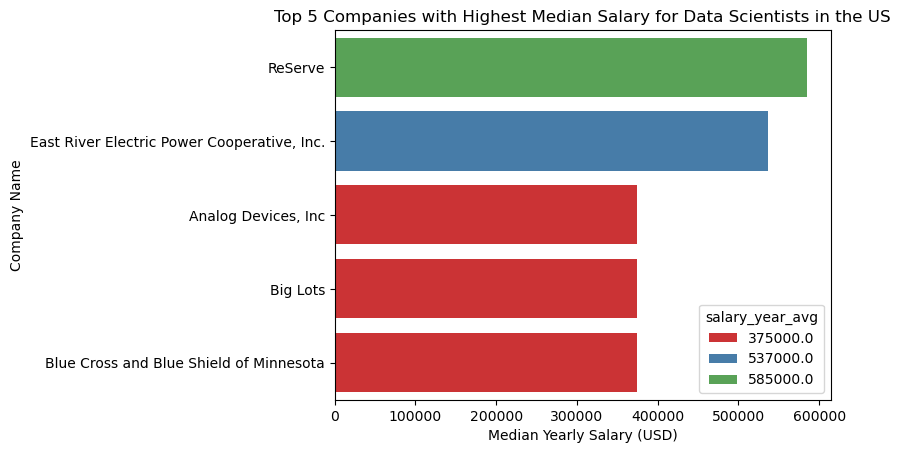

In [4]:
df_US_DS = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Scientist')].dropna(subset='salary_year_avg').copy()
df_top_companies = df_US_DS.groupby('company_name')['salary_year_avg'].median().nlargest(5).reset_index()
sns.barplot(data=df_top_companies, x='salary_year_avg', y='company_name', hue='salary_year_avg', palette='Set1')
plt.title('Top 5 Companies with Highest Median Salary for Data Scientists in the US')
plt.xlabel('Median Yearly Salary (USD)')
plt.ylabel('Company Name')
plt.show()

---

## 🟨 Data Scientist Salary Histogram (2.20.2)

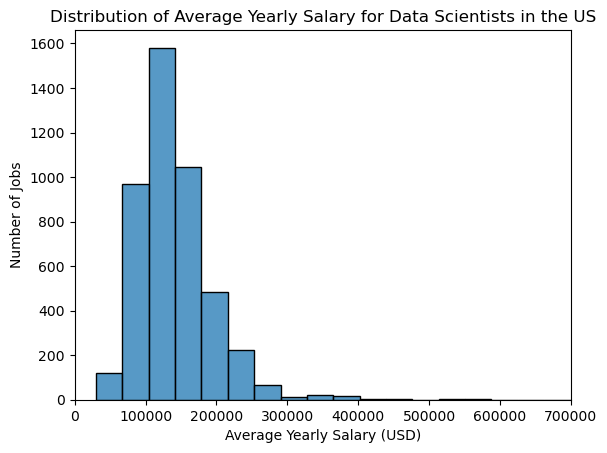

In [ ]:
sns.histplot(df_US_DS['salary_year_avg'], bins=25)
plt.title('Distribution of Average Yearly Salary for Data Scientists in the US')
plt.xlabel('Average Yearly Salary (USD)')
plt.ylabel('Number of Jobs')
plt.xlim(0, 700000)
plt.show()


---

## 🟨 Data Roles Salary Box Plot (2.20.3)

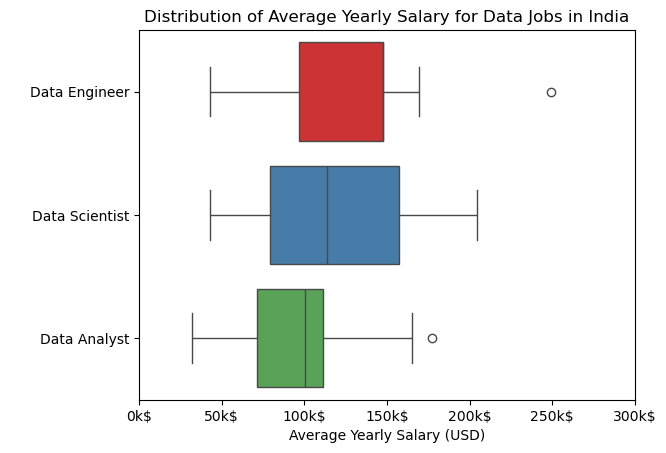

In [5]:
# Code Needed
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_IND = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'India')].dropna(subset='salary_year_avg').copy()
sns.boxplot(data=df_IND, x='salary_year_avg', y='job_title_short', hue='job_title_short', palette='Set1')
plt.title('Distribution of Average Yearly Salary for Data Jobs in India')
plt.xlabel('Average Yearly Salary (USD)')
plt.ylabel(' ')
plt.xlim(0, 300000)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}k$'))
plt.show()

---

## 🟨 Salary Distribution for United States (2.20.4)

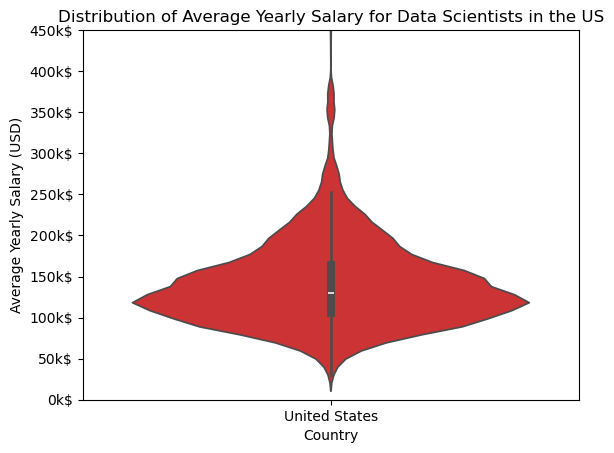

In [8]:
sns.violinplot(data=df_US_DS, x='job_country', y='salary_year_avg', hue='job_country', palette='Set1')
plt.title('Distribution of Average Yearly Salary for Data Scientists in the US')
plt.xlabel('Country')
plt.ylabel('Average Yearly Salary (USD)')
plt.ylim(0, 450000)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}k$'))
plt.show()

---